In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [2]:
teams_df = pd.read_csv('data/2025/mens_l2_sw_teams.csv')
teams_df

,Club ID,Club
0,175385,FC LONDON L2 MEN
1,175328,GUELPH UNITED L2 MEN
2,175333,HAMILTON UNITED L2 MEN
3,175406,WINDSOR CITY FC L2 MEN
4,183410,CAMBRIDGE UNITED MEN
5,175399,ST CATHARINES ROMA L2 MEN
6,183422,WATERLOO UNITED L2 MEN
7,183411,RAILWAY CITY FC MEN


In [3]:
scores_df = pd.read_csv('data/2025/2025-06-28_mens_l2_sw_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262605117,1,2,175406,175333
1,262605118,9,0,183410,183422
2,262605119,2,0,175385,175399
3,262605120,0,1,175333,183411
4,262605121,2,2,175399,175328
5,262605122,2,1,183410,175406
6,262605123,0,1,175385,183422
7,262605124,0,2,183422,175328
8,262605125,7,0,183411,175406
9,262605126,1,5,175333,175399


In [4]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [5]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           FC LONDON L2 MEN  GUELPH UNITED L2 MEN  HAMILTON UNITED L2 MEN  WINDSOR CITY FC L2 MEN  CAMBRIDGE UNITED MEN  ST CATHARINES ROMA L2 MEN  WATERLOO UNITED L2 MEN  RAILWAY CITY FC MEN
262605117                 0                     0                       1                      -1                     0                          0                       0                    0
262605118                 0                     0                       0                       0                     1                          0                      -1                    0
262605119                 1                     0                       0                       0                     0                         -1                       0                    0
262605120                 0                     0                      -1                       0                     0                          0                       0                    1
262605121                 0             

In [6]:
print(X_df.T.to_string())

                           262605117  262605118  262605119  262605120  262605121  262605122  262605123  262605124  262605125  262605126  262605127  262605128  262605129  262605130  262605131  262605133  262605134  262605135  262605136  262605137  262605138  262605139  262605141  262605142  262605143  262605144  262605145  262605146  262605147  262605148  262605149  262605151  262605152  262605153  262605154  262605155  262605156
FC LONDON L2 MEN                   0          0          1          0          0          0         -1          0          0          0         -1          0          0          0         -1          0          0          0          0          0          0          1          0          0         -1          0          0          0          1          0         -1          0          0          0          0         -1          0
GUELPH UNITED L2 MEN               0          0          0          0         -1          0          0          1          0          

In [7]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                           FC LONDON L2 MEN  GUELPH UNITED L2 MEN  HAMILTON UNITED L2 MEN  WINDSOR CITY FC L2 MEN  CAMBRIDGE UNITED MEN  ST CATHARINES ROMA L2 MEN  WATERLOO UNITED L2 MEN  RAILWAY CITY FC MEN
FC LONDON L2 MEN                          9                     0                      -1                      -2                    -1                         -2                      -2                   -1
GUELPH UNITED L2 MEN                      0                     7                      -1                      -1                    -1                         -1                      -1                   -2
HAMILTON UNITED L2 MEN                   -1                    -1                      10                      -2                    -1                         -1                      -2                   -2
WINDSOR CITY FC L2 MEN                   -2                    -1                      -2                      10                    -2                         -1      

In [8]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                           FC LONDON L2 MEN  GUELPH UNITED L2 MEN  HAMILTON UNITED L2 MEN  WINDSOR CITY FC L2 MEN  CAMBRIDGE UNITED MEN  ST CATHARINES ROMA L2 MEN  WATERLOO UNITED L2 MEN  RAILWAY CITY FC MEN
FC LONDON L2 MEN                          9                     0                      -1                      -2                    -1                         -2                      -2                   -1
GUELPH UNITED L2 MEN                      0                     7                      -1                      -1                    -1                         -1                      -1                   -2
HAMILTON UNITED L2 MEN                   -1                    -1                      10                      -2                    -1                         -1                      -2                   -2
WINDSOR CITY FC L2 MEN                   -2                    -1                      -2                      10                    -2                         -1      

In [9]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                           GD
FC LONDON L2 MEN           -2
GUELPH UNITED L2 MEN        4
HAMILTON UNITED L2 MEN    -24
WINDSOR CITY FC L2 MEN     -4
CAMBRIDGE UNITED MEN       24
ST CATHARINES ROMA L2 MEN  11
WATERLOO UNITED L2 MEN    -17
RAILWAY CITY FC MEN         0


In [10]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                           GD with limited blowouts
FC LONDON L2 MEN                                 -1
GUELPH UNITED L2 MEN                              4
HAMILTON UNITED L2 MEN                          -17
WINDSOR CITY FC L2 MEN                            0
CAMBRIDGE UNITED MEN                             12
ST CATHARINES ROMA L2 MEN                        10
WATERLOO UNITED L2 MEN                          -10
RAILWAY CITY FC MEN                               0


In [11]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                           massey_rating
CAMBRIDGE UNITED MEN            2.200931
ST CATHARINES ROMA L2 MEN       1.132959
RAILWAY CITY FC MEN             0.678198
GUELPH UNITED L2 MEN            0.628351
FC LONDON L2 MEN               -0.348609
WINDSOR CITY FC L2 MEN         -0.404438
WATERLOO UNITED L2 MEN         -1.586256
HAMILTON UNITED L2 MEN         -2.301136


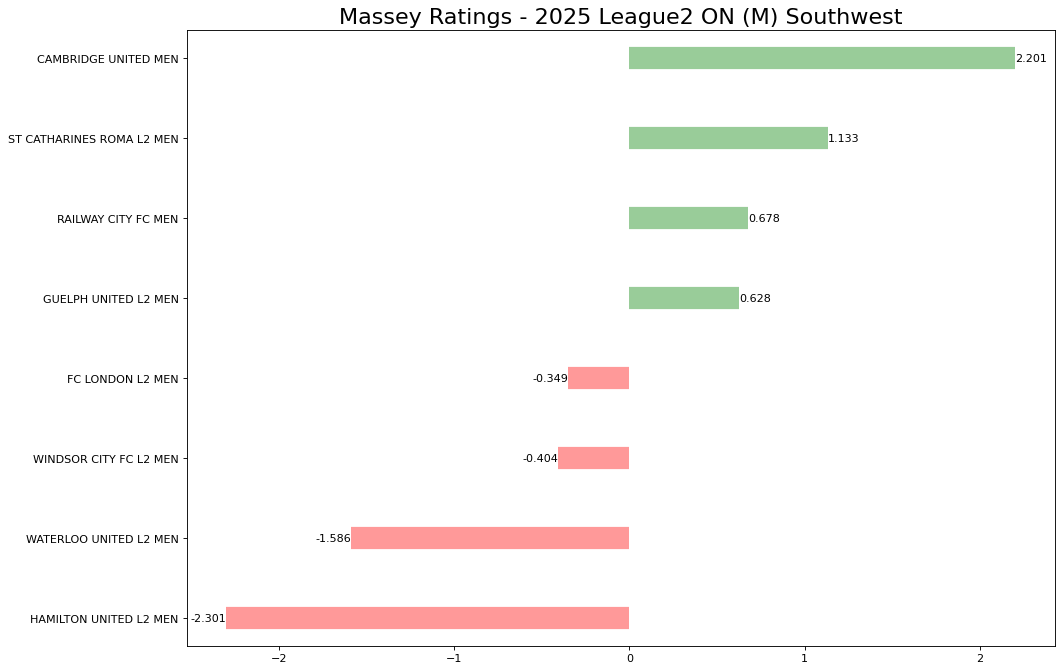

In [12]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Southwest', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [13]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                           massey_rating
CAMBRIDGE UNITED MEN            1.096651
ST CATHARINES ROMA L2 MEN       1.001719
GUELPH UNITED L2 MEN            0.541480
RAILWAY CITY FC MEN             0.174514
WINDSOR CITY FC L2 MEN         -0.062202
FC LONDON L2 MEN               -0.157326
WATERLOO UNITED L2 MEN         -0.971293
HAMILTON UNITED L2 MEN         -1.623544


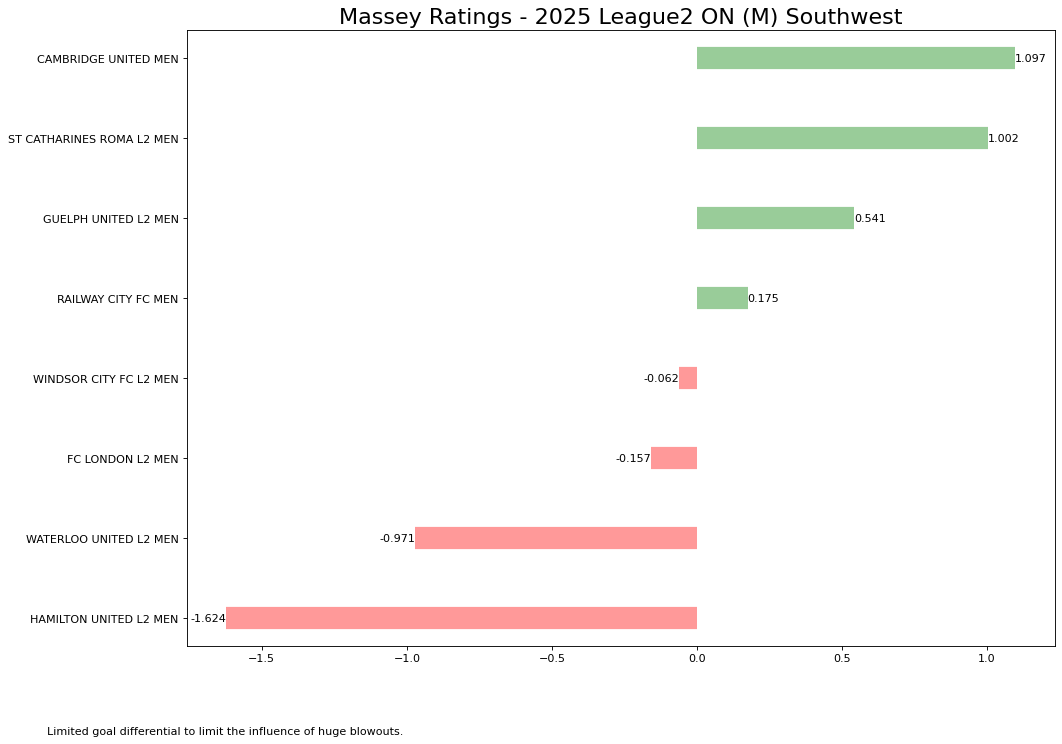

In [14]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Southwest', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()